# factqr


## Finding Factors of a Composite Number
-----------------------------------------------

Composite numbers are numbers that are made up of some power of primes. For example;

Let $n = 3780$ so then $n$ in its composite form is :

$n = 2^{2} * 3^{3} * 5^{1} * 7^{1}$

Using current known methodolgy, like Shor's algorithm you are guaranteed at least one of the primes per run of the algorithm. By running Shor's factoring algorithm on $n$, the answers that will be returned is either $2,3,5,7$ but not the full composite form as shown above.

Therefore, we propose a VQE algorithm that is able to find the composite prime expression of the number. First, we need to construct a Hamiltonian that describes the possible 'states'/ solution of the problem, to keep the problem simple we keep the number of primes small, $|primes| = 3$ and choose $n$ such that it can be expressed within the 3 prime numbers. The general structure of $n$ is :

$n = 2^{x_{0}} * 3^{x_{1}} * 5^{x_{2}}$ where $x_{i} \in Z^{+}$ but we need our variables $x$ to be binary valued so that it can be used on the quantum computer, so we convert $x$ into its binary expression:

$n = 2^{2^{0}.x_{0,0} + 2^{1} .x_{0,1} + 2^{2}.x_{0,2} .....} * 3^{2^{0}.x_{1,0} + 2^{1}.x_{1,1} + 2^{2} .x_{1,2} .....} * 5^{2^{0}.x_{2,0} + 2^{1}.x_{2,1} + 2^{2}.x_{2,2} .....}$ 

Furthermore, lets limit the binary expression to $2^{0}.x_{0} + 2^{1} .x_{0}$ and order the $x_{i,j}$ to just $x_{i}$ to get :

$n = 2^{2^{0}.x_{0} + 2^{1} .x_{1}} * 3^{2^{0}.x_{2} + 2^{1}.x_{3} } * 5^{2^{0}.x_{4} + 2^{1}.x_{5}}$ 

In order to construct the **Hamiltonian** we need to do the following:

**1.** $\ln$ both sides of the equation:

$\ln(n) = \ln(2^{2^{0}.x_{0} + 2^{1} .x_{1}} * 3^{2^{0}.x_{2} + 2^{1}.x_{3} } * 5^{2^{0}.x_{4} + 2^{1}.x_{5}})$

$ = \ln(2^{2^{0}.x_{0} + 2^{1} .x_{1}})  + \ln(3^{2^{0}.x_{2} + 2^{1}.x_{3}}) + \ln( 5^{2^{0}.x_{4} + 2^{1}.x_{5}})$ and we can also bring the exponents down:
$ = \ln(2) * 2^{0}.x_{0} + 2^{1} .x_{1}  + \ln(3) * 2^{0}.x_{0} + 2^{1} .x_{1} + \ln(5) * 2^{0}.x_{0} + 2^{1} .x_{1}$


**2.** With the full equation $ \ln(n) = \ln(2) * 2^{0}.x_{0} + 2^{1} .x_{1}  + \ln(3) * 2^{0}.x_{0} + 2^{1} .x_{1} + \ln(5) * 2^{0}.x_{0} + 2^{1} .x_{1}$ we substitute $x_{i}$ with $\frac{1}{2}(I - Z_{i})$ to get :

$ \ln(n) = \ln(2) * 2^{0}.\frac{1}{2}(I - Z_{0}) + 2^{1} .\frac{1}{2}(I - Z_{1})  + \ln(3) * 2^{0}.\frac{1}{2}(I - Z_{3}) + 2^{1} .\frac{1}{2}(I - Z_{4}) + \ln(5) * 2^{0}.\frac{1}{2}(I - Z_{5}) + 2^{1}.\frac{1}{2}(I - Z_{6})$



**3.** Now we have a Hamiltonian that is Hermitian since all the values along the digonals are real and the transpose-conjugate is itself. However, for some combination of the Z variables would result in some of the diagonals being negative-valued so that when minimizing the expectation value has a high chance of producing negative-valued results which is clearly the wrong solution. So in order to prevent such issues, 

We let $X = \ln(2) * 2^{0}.\frac{1}{2}(I - Z_{0}) + 2^{1} .\frac{1}{2}(I - Z_{1})  + \ln(3) * 2^{0}.\frac{1}{2}(I - Z_{3}) + 2^{1} .\frac{1}{2}(I - Z_{4}) + \ln(5) * 2^{0}.\frac{1}{2}(I - Z_{5}) + 2^{1}.\frac{1}{2}(I - Z_{6})$

to get : $\ln(n) = X$ Then we move $X$ to the other RHS of the equation to get $\ln(n) - X$, where the correct combination of $Z_{i}$ will give the result 0, hence we can simply square the equation to remove the negative-valued diagonals and the correct solution will always be the 0 solution.

$(\ln(n) - X)^{2} = \ln(n)^{2} - 2 * \ln(n).X + X^{2}$ , 

where  $X = \ln(2) * 2^{0}.\frac{1}{2}(I - Z_{0}) + 2^{1} .\frac{1}{2}(I - Z_{1})  + \ln(3) * 2^{0}.\frac{1}{2}(I - Z_{3}) + 2^{1} .\frac{1}{2}(I - Z_{4}) + \ln(5) * 2^{0}.\frac{1}{2}(I - Z_{5}) + 2^{1}.\frac{1}{2}(I - Z_{6})$

**Viola!** Now we have a Hamiltonian, that describes our problem well, all we have to is use VQE to find the smallest Eigenvalue which in our case is 0 and the associated Eigenvector to find the composite form of the number.

-----------------------------------------

Let's begin coding it out, lets first import the required libraries:

In [1]:
import pennylane as qml
# import numpy as np
from copy import deepcopy
from qiskit import *
import random
import time
from numpy import log as ln
import warnings
import math
from pennylane import numpy as np
from matplotlib import pyplot as plt
from functools import partial
from qiskit.algorithms.optimizers import ADAM, AQGD, COBYLA, SPSA, TNC, CG, L_BFGS_B, GSLS, NELDER_MEAD, NFT, P_BFGS, POWELL, SLSQP
from qiskit.opflow.gradients import Gradient, NaturalGradient, QFI
from qiskit.opflow import CircuitStateFn, StateFn, I, X, Y, Z, H, CX, Zero, One, OperatorBase
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE
from qiskit.circuit.library import TwoLocal
from itertools import combinations as cm

Let us begin by generating the Hamiltonian, which we will create using Qiskit then convert it to a Pennylane Hamiltonian as pennylane has limited arithmetic that can be done on the Hamiltonian class. Below are the functions to generate the Hamiltonian we need:

In [2]:
# Utility Functions
def genZ(index, size):
    if index == 0:
        z = Z
    else:
        z = I
        
    for i in range(1, size):
        if index == i:
            z = z ^ Z
        else:
            z = z ^ I
    return z

def genI(size):
    i = I
    for j in range(1, size):
        i = i ^ I
    return i

# Hamiltonian Generator Functions
def X_generator(primes, qbit_coeff, identity):
    for i in range(len(primes)):
        for j in range(len(qbit_coeff)):
            if j == 0:
                x_prime = qbit_coeff[j] * 1/2 * (identity - genZ(i * len(qbit_coeff) + j, len(primes) * len(qbit_coeff)))
            else:
                x_prime += qbit_coeff[j] * 1/2 * (identity - genZ(i * len(qbit_coeff) + j, len(primes) * len(qbit_coeff)))
        
        x_prime *= ln(primes[i])  
        if i == 0:
            x = x_prime
        else:
            x += x_prime

    return x

def hamiltonian(n, primes, qbit_coeff):
    #Generate Hamiltonian according to number of primes
    identity = genI(len(primes) * len(qbit_coeff))
        
    x = X_generator(primes, qbit_coeff, identity)
    
    lnn = float(ln(n))
    
    h = (lnn * identity - x)**2
    
    return h

def genZ_pennylane(indexes, size):
    
    for i in range(size):
        if i in indexes:
            z = qml.PauliZ(i)
        else:
            z = qml.Identity(i)
        if i == 0:
            z_full = z
        else:
            z_full @= z
    return z_full


def genI_pennylane(size):
    identity = qml.Identity(0)
    for i in range(1, size):
        identity @= qml.Identity(i)
    return identity    

**Setting up the problem** :

Let us use $n = 20 = 2^{2} * 3^{0} * 5^{1}$ so the basis vector we are looking for is : $|2,0,1\rangle = |010010\rangle$.

For this problem, we shall use **3 primes** and at most **2 bits** for the exponent for each prime, so the number of qubits required is **6**. 

In [3]:
primes = [2, 3, 5, 7, 11] # dit_coeff
qbit_coeff = [2**0, 2**1, 2**2, 2**3, 2**4]

n = 20
layer = 2
no_dits = 2
no_primes = 3
primes = primes[:no_primes]
qbit_coeff = qbit_coeff[:no_dits]
qubits = no_primes * no_dits
print("Total Resource Required = ", no_dits * no_primes)

Total Resource Required =  6


Then we generate the Hamiltonian as shown above.... and get the eigenvalues. It can been seen that the lowest Eigenvalue is approximately 0 and thats the vector we are looking for. Then we convert it to a Pennylane Hamiltonian class.

In [4]:
# generate Hamiltonian and the 1st eignvalue shown is the solution.
H = hamiltonian(n, primes, qbit_coeff)
strings = H.primitive
sorted(np.linalg.eigvals(H.to_matrix()))

[tensor(8.8817842e-16+0.j, requires_grad=True),
 tensor(0.01110084+0.j, requires_grad=True),
 tensor(0.03324115+0.j, requires_grad=True),
 tensor(0.04979304+0.j, requires_grad=True),
 tensor(0.08276097+0.j, requires_grad=True),
 tensor(0.09006277+0.j, requires_grad=True),
 tensor(0.16440195+0.j, requires_grad=True),
 tensor(0.26094282+0.j, requires_grad=True),
 tensor(0.34549316+0.j, requires_grad=True),
 tensor(0.48045301+0.j, requires_grad=True),
 tensor(0.48045301+0.j, requires_grad=True),
 tensor(0.63761454+0.j, requires_grad=True),
 tensor(0.65760782+0.j, requires_grad=True),
 tensor(0.83958871+0.j, requires_grad=True),
 tensor(0.83958871+0.j, requires_grad=True),
 tensor(0.98654908+0.j, requires_grad=True),
 tensor(1.20694896+0.j, requires_grad=True),
 tensor(1.44955051+0.j, requires_grad=True),
 tensor(1.64079152+0.j, requires_grad=True),
 tensor(1.7470385+0.j, requires_grad=True),
 tensor(1.92181206+0.j, requires_grad=True),
 tensor(2.26224882+0.j, requires_grad=True),
 tensor(

In [5]:
H_String = None
for i in range(len(strings)):
    gate = strings[i].paulis[0]
    coeff = strings[i].coeffs[0].real
    indexes = [pos for pos,char in enumerate(str(strings[i].paulis[0])) if char == 'Z']
    if len(indexes) == 0:
        temp = genI_pennylane(qubits)
    else:
        temp = genZ_pennylane(indexes, qubits)
    if i == 0:
        H_String = coeff * temp
    else:
        H_String += coeff * temp
print(H_String)

  (-6.779157848035609) [Z5]
+ (-4.6274951404673885) [Z3]
+ (-3.3895789240178047) [Z4]
+ (-2.919624368628206) [Z1]
+ (-2.313747570233694) [Z2]
+ (-1.459812184314103) [Z0]
+ (9.782620186091165) [I0]
+ (0.3807500052094045) [Z0 Z2]
+ (0.4804530139182014) [Z0 Z1]
+ (0.5577886756449904) [Z0 Z4]
+ (0.761500010418809) [Z0 Z3]
+ (0.761500010418809) [Z1 Z2]
+ (0.8840741342242259) [Z2 Z4]
+ (1.1155773512899807) [Z0 Z5]
+ (1.1155773512899807) [Z1 Z4]
+ (1.206948960812582) [Z2 Z3]
+ (1.523000020837618) [Z1 Z3]
+ (1.7681482684484517) [Z2 Z5]
+ (1.7681482684484517) [Z3 Z4]
+ (2.2311547025799614) [Z1 Z5]
+ (2.5902903939802346) [Z4 Z5]
+ (3.5362965368969035) [Z3 Z5]


Now that the Hamiltonian is generated,we can now use VQE to find the eigenvector that has the mimimum eigenvalue, for this example we shall keep it simple and use Pennylane's SimplifedTwoDesign anstaz to aid us with the heuristic. 

In [6]:
dev = qml.device("default.qubit", wires=qubits)

In [7]:
def circuit(weights):
    shapes = qml.SimplifiedTwoDesign.shape(n_layers=layer, n_wires=qubits)
    params_0 = np.reshape(weights[0: qubits], shapes[0])
    params_1 = np.reshape(weights[qubits: len(weights)], shapes[1])
    qml.SimplifiedTwoDesign(initial_layer_weights=params_0, weights=params_1, wires=range(qubits))

@qml.qnode(dev)
def cost_fn(weights):
    circuit(weights)
    return qml.expval(H_String)

# def wrapper(weights):
#     res = np.log(cost_fn(weights))
#     return res

@qml.qnode(dev)
def get_probs(weights):
    circuit(weights)
    return qml.probs(wires=range(qubits))

# shape = qml.SimplifiedTwoDesign.shape(n_layers=layer, n_wires=qubits)
weights = np.array([np.random.random() for _ in range(qubits + (((qubits-1)*2)*layer))], requires_grad=True)
# l = 1
# for s in shape:
#     l *= s
# weights = np.array([np.random.random() for _ in range(l)], requires_grad=True)

#Test to see if the functions works(if at all)
expectation = [cost_fn(weights)]
print("expectation = ", [expectation])

expectation =  [[tensor(8.7373038, requires_grad=True)]]


The next step is just to use a optimizer to find the mimimum eigenvector with regards to the problem and hope the optimizer manages to find the solution......

In [8]:
max_iter = 100
conv_tol = 1e-05
opt_pennylane =  qml.AdamOptimizer(stepsize=0.1)

angle = [weights]

for i in range(max_iter):

    weights, prev_expectation = opt_pennylane.step_and_cost(cost_fn, weights)
    expectation.append(cost_fn(weights))
    angle.append(weights)
    
    conv = np.abs(expectation[-1] - prev_expectation)
    
    if i % 10 == 0:
        print(f"Step = {i},  Expectation = {expectation[-1]:.8f}")
    
#     if conv <= conv_tol:
#         break

print("\n" f"Final value of expectation = {expectation[-1]:.8f}")

Step = 0,  Expectation = 5.46909637
Step = 10,  Expectation = 0.30943009
Step = 20,  Expectation = 0.07900430
Step = 30,  Expectation = 0.06776336
Step = 40,  Expectation = 0.02245954
Step = 50,  Expectation = 0.01461069
Step = 60,  Expectation = 0.00504090
Step = 70,  Expectation = 0.00180870
Step = 80,  Expectation = 0.00103121
Step = 90,  Expectation = 0.00068079

Final value of expectation = 0.00049871


Now that we have the optimal parameters we can now find the associated eigenvector by find the basis vector with the highest probability 

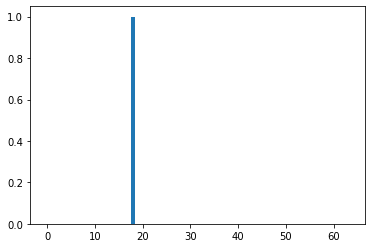

In [9]:
probs = np.array(get_probs(angle[-1])).tolist()
from matplotlib import pyplot as plt
plt.bar(range(2**qubits), probs)
plt.show()

In [10]:
highest_prob = max(probs)
bitstring = str(format(probs.index(highest_prob), "b"))
while (len(bitstring)<qubits):
    bitstring = '0' + bitstring
answer = 1
prime_index = 0
exp_list = []
for i in range(0, len(bitstring), no_dits):
    exp = int(bitstring[i: i + no_dits][::-1], 2)
    exp_list.append(exp)
    answer *= primes[prime_index] ** exp
    prime_index += 1
print("Highest Probability: ", highest_prob, "\nAnswer: ", answer, " Deviation: ",  n-answer)

# Reconstruct the exponent
exp_str = ""
for i in range(no_primes):
    exp_str += str(primes[i]) + "^" + str(exp_list[i]) + " "

print("n in its estimated composite form = ", exp_str)

Highest Probability:  0.999663195759012 
Answer:  20  Deviation:  0
n in its estimated composite form =  2^2 3^0 5^1 


Simple composite numbers such as 20 can be found easily with our heurisitic.

Let us try a larger example, $n = 4200 = 2^{3} * 3^{1} * 5^{2} * 7^{1}$ so the basis vector we are looking for is : $|3,1,2,1\rangle = |11011010\rangle$.

For this problem, we only need **4 primes** and at most **2 bits** for the exponent for each prime, so the number of qubits required is **8**. 
We will re-initialize everything and run the entire process in the cell below:

In [12]:
primes = [2, 3, 5, 7, 11] # dit_coeff
qbit_coeff = [2**0, 2**1, 2**2, 2**3, 2**4]

n = 4200
layer = 8
no_dits = 2
no_primes = 4
primes = primes[:no_primes]
qbit_coeff = qbit_coeff[:no_dits]
qubits = no_primes * no_dits

H = hamiltonian(n, primes, qbit_coeff)
strings = H.primitive

H_String = None
for i in range(len(strings)):
    gate = strings[i].paulis[0]
    coeff = strings[i].coeffs[0].real
    indexes = [pos for pos,char in enumerate(str(strings[i].paulis[0])) if char == 'Z']
    if len(indexes) == 0:
        temp = genI_pennylane(qubits)
    else:
        temp = genZ_pennylane(indexes, qubits)
    if i == 0:
        H_String = coeff * temp
    else:
        H_String += coeff * temp

dev = qml.device("default.qubit", wires=qubits)

def circuit_2(weights):
    shape = qml.QAOAEmbedding.shape(n_layers=layer, n_wires=qubits)
    params = np.reshape(weights, shape)
    qml.QAOAEmbedding(features=[], weights=params, wires=range(qubits))
    
@qml.qnode(dev)    
def cost_fn(weights):
    circuit_2(weights)
    return qml.expval(H_String)

def wrapper(weights):
    res = np.log(cost_fn(weights))
    return res

@qml.qnode(dev)
def get_probs(weights):
    circuit_2(weights)
    return qml.probs(wires=range(qubits))

np.random.seed(1)
shape = qml.QAOAEmbedding.shape(n_layers=layer, n_wires=qubits)
l = 1
for s in shape:
    l *= s
weights = np.array([np.random.random() for _ in range(l)], requires_grad=True)

#Test to see if the functions works(if at all)
expectation = [wrapper(weights)]

# Start the training process
max_iter = 1000
conv_tol = 1e-06
opt_pennylane =  qml.MomentumOptimizer(stepsize=0.01)

angle = [weights]

for i in range(max_iter):

    weights, prev_expectation = opt_pennylane.step_and_cost(wrapper, weights)
    expectation.append(cost_fn(weights))
    angle.append(weights)
    
    conv = np.abs(expectation[-1] - prev_expectation)
    
    if i % 10 == 0:
        print(f"Step = {i},  Expectation = {expectation[-1]:.8f}")

print("\n" f"Final value of expectation = {expectation[-1]:.8f}")

Step = 0,  Expectation = 12.11331420
Step = 10,  Expectation = 8.69402482
Step = 20,  Expectation = 5.10858756
Step = 30,  Expectation = 3.31553521
Step = 40,  Expectation = 1.99921076
Step = 50,  Expectation = 1.23371542
Step = 60,  Expectation = 0.55606368
Step = 70,  Expectation = 0.23053269
Step = 80,  Expectation = 0.18585970
Step = 90,  Expectation = 0.12143843
Step = 100,  Expectation = 0.11305281
Step = 110,  Expectation = 0.11495876
Step = 120,  Expectation = 0.10975141
Step = 130,  Expectation = 0.10860937
Step = 140,  Expectation = 0.10740557
Step = 150,  Expectation = 0.10550101
Step = 160,  Expectation = 0.10374914
Step = 170,  Expectation = 0.10220599
Step = 180,  Expectation = 0.10069142
Step = 190,  Expectation = 0.09921384
Step = 200,  Expectation = 0.09780899
Step = 210,  Expectation = 0.09651286
Step = 220,  Expectation = 0.09538389
Step = 230,  Expectation = 0.09451246
Step = 240,  Expectation = 0.09371623
Step = 250,  Expectation = 0.09300940
Step = 260,  Expectati

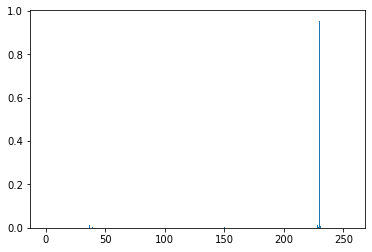

In [13]:
probs = np.array(get_probs(angle[-1])).tolist()
from matplotlib import pyplot as plt
plt.bar(range(2**qubits), probs)
plt.show()

In [14]:
highest_prob = max(probs)
bitstring = str(format(probs.index(highest_prob), "b"))
while (len(bitstring)<qubits):
    bitstring = '0' + bitstring
answer = 1
prime_index = 0
exp_list = []
for i in range(0, len(bitstring), no_dits):
    exp = int(bitstring[i: i + no_dits][::-1], 2)
    exp_list.append(exp)
    answer *= primes[prime_index] ** exp
    prime_index += 1
print("Highest Probability: ", highest_prob, "\nAnswer: ", answer, " Deviation: ",  n-answer)

# Reconstruct the exponent
exp_str = ""
for i in range(no_primes):
    exp_str += str(primes[i]) + "^" + str(exp_list[i]) + " "

print("n in its estimated composite form = ", exp_str)

Highest Probability:  0.9555123437280777 
Answer:  4200  Deviation:  0
n in its estimated composite form =  2^3 3^1 5^2 7^1 


As you can see, it managed to get the solution(with help) and the combination of bit string that would reproduce the values.
This method can used as a factoring machine as it is not limited by the primes and it can be substituted with any potential factors you would like, our solution provides a flexible means of finding factors of a given integer. However, like most other VQE problems currently larger numbers/problems might pose a problem to this heuristic as it would be more diffcult to find the 0 point. 